# Audio Spectrum Analyzer and Visualization

## Background 

An audio spectrum analyzer is a tool used to visualize and analyze the frequency components of an audio signal. It is often used by audio engineers and musicians to identify and adjust specific frequencies in a sound. In this project, we will cover the basics frequency analyzer and functionality of an audio spectrum analyzer. 
What are the components of an audio spectrum analyzer?
There are different components in audio spectrum in the process of analyzing and representing audio signal. Some of the basic components are discussed hereunder. 

	Input device: The input device captures the audio signal and sends it to the analyzer for processing.

	ADC (analog to digital converter): The ADC converts the analog audio signal into a digital signal that the analyzer can process.
 
	Signal processing: The signal processing component analyzes the digital audio signal to determine the frequency components of the audio.
 
	FFT (Fast Fourier Transform): The FFT is a mathematical algorithm used to transform the audio signal from the time domain to the frequency domain.
 
	Visualization: The visualization component displays the frequency components of the audio signal in a graphical format.

What are the types of visualization?

	Waveform: A waveform visualization displays the amplitude of the audio signal over time. It is useful for visualizing the overall loudness of a sound and identifying specific peaks or troughs in the signal.
 
	Spectrum: A spectrum visualization displays the frequency components of the audio signal. It is useful for identifying specific frequencies in the sound and adjusting them as needed.
 
	Spectrogram: A spectrogram visualization displays the frequency components of the audio signal over time. It is useful for identifying changes in the frequency components of the sound over time, such as a sudden increase in volume or the appearance of a new frequency component.
 
	Waterfall: A waterfall visualization displays the frequency components of the audio signal over time in a three-dimensional format. It is useful for identifying changes in the frequency components of the sound over time and seeing how they interact with each other.
 
But in this project we only used the waveform and spectrum visualizations. 


### Statement of Problem

Design an audio spectrum analyzer and visualization system that can take an audio input and provide a real-time display of the spectrum of the audio signal. The system should be able to analyze and visualize in both time and frequency domains, and provide a graphical representation of the audio signal’s spectral content. 
Audio spectrum analyzers and visualizations are commonly used to solve various problems related to audio signal processing, including:

Sound engineering: audio spectrum analyzer are used to analyze and visualize the frequency content of audio signals, which is critical in sound engineering for tasks such as equalization and mixing. 

Noise reduction: audio spectrum analyzers can help identify the specific frequencies of un wanted noise in an audio signal, allowing for targeted noise reduction and removal.

Music production: audio spectrum analyzers can be used to analyze the frequency content of musical instruments and vocals, allowing for better mixing mastering of trucks.

Acoustic analysis: audio spectrum analyzers can be used to analyze the frequency response of acoustic spaces, such as concert halls or recording studios, to better understand their sound characteristics.

Speech recognition: audio spectrum analyzers can be used in speech recognition systems to extract features from speech signal, such as format frequencies that can be used to recognize and transcribe spoken words.

Overall, audio spectrum analyzers and visualizations play an important role in many different fields that involve audio signal processing, allowing for better understanding and manipulation of sound and music. 


## Objective

### General Objective:
The main objective of this project is to make an audio spectrum analyzer and visualization tool which is intended to provide a detailed analysis of the frequency components of an audio signal, in order to improve the quality of the sound.

### Specific Objectives:
1. To observe the time domain representation of audio signal waveforms.
2. To see the frequency content of an audio signal and identify specific frequencies that may need to be adjusted or removed. 
3. To observe the visualization for different audio inputs

## Methodology 

The methodology for this project will involve the use of both theoretical analysis and practical implementation to demonstrate the effectiveness of the STFT for noise reduction in audio signals. The methdology for this project can be broken down into the following steps:

1. **Information gathering**: We first tried to gather as much information we can collect as possible and made summarization on it. The standard sampling frequency is 44.1 kHz or 44,100 samples per second. 48 kHz is also used as audio sample rate commonly used for movies. We used the 44.1 kHz sampling frequency for our project. The commonly referenced frequency range of audio is 20 Hz to 20,000 Hz. So, our plot should consider ranges of values between 20 Hz to 20,000 Hz.

2. **Determining the Modules to be used**: Next, we determined the types of modules which are necessary for writing the code in Python. The modules we used in this project are listed below.

3. **Analysis**: The fast fourier transform was computed and the waveform plotted.

4. **Testing**: The waveform for different input audio signals were analyzed and visualised.


## Simulation

#### Step - 1: Importing the necessary modules and libraries
pyaudio, numpy, struct and matplotlib.pylot

In [ ]:
# basic imports of modules and libraries
import struct
import pyaudio
import matplotlib.pyplot
import numpy as np

#### Step - 2 Declaring standard variables



In [ ]:

#  VARIABLES
CHUNK = 1024*2
FORMAT = pyaudio.paInt16 # audio format
CHANNELS = 1 # number of channels
RATE = 44100  # sampling frequency in Hz

#### Step 3: Creating object

After declaring variables, the next step was to create a py audio object.

In [ ]:
#  OBJECTS/INSTANCES
p = pyaudio.PyAudio()

**Step - 4: Opening stream nd finishing the code**

In [ ]:
# openning stream
stream = p.open(
    format=FORMAT,
    channels=CHANNELS,
    rate=RATE,
    input=True,
    output=True,
    frames_per_buffer=CHUNK
)

fig, (plot_one, plot_two) = matplotlib.pyplot.subplots(2, figsize=(5, 5))
x = np.arange(0, 2*CHUNK, 2)

#FFT computation
x_fft = np.linspace(0, RATE, CHUNK)

# line plotes
line, = plot_one.plot(x, np.random.rand(CHUNK), '-', lw=1)
line_fft, = plot_two.semilogx(x_fft, (np.random.rand(CHUNK)), '-', lw=1)

# time domain plot parameters' labels
plot_one.set_title("AUDIO VISUALIZATION\n")
plot_one.set_ylim(-500, 500)
plot_one.set_xlim(0, CHUNK)
plot_one.set_xlabel("Time")
plot_one.set_ylabel("Amplitude")
plot_one.grid()

# frequency domain plot parameters' labels
plot_two.set_xlim(20, RATE/2)
plot_two.set_ylim(0, 0.01)
plot_two.set_xlabel("Frequency")
plot_two.set_ylabel("Magnitude")
plot_two.grid()

matplotlib.pyplot.tight_layout()
fig.show()

# loop for streaming audio
while True:
    data = stream.read(CHUNK)
    dataInt = struct.unpack(str(CHUNK) + 'h', data)
    line.set_ydata(dataInt)
    line_fft.set_ydata(np.abs(np.fft.fft(dataInt))*2/(11000*CHUNK))
    fig.canvas.draw()
    fig.canvas.flush_events()

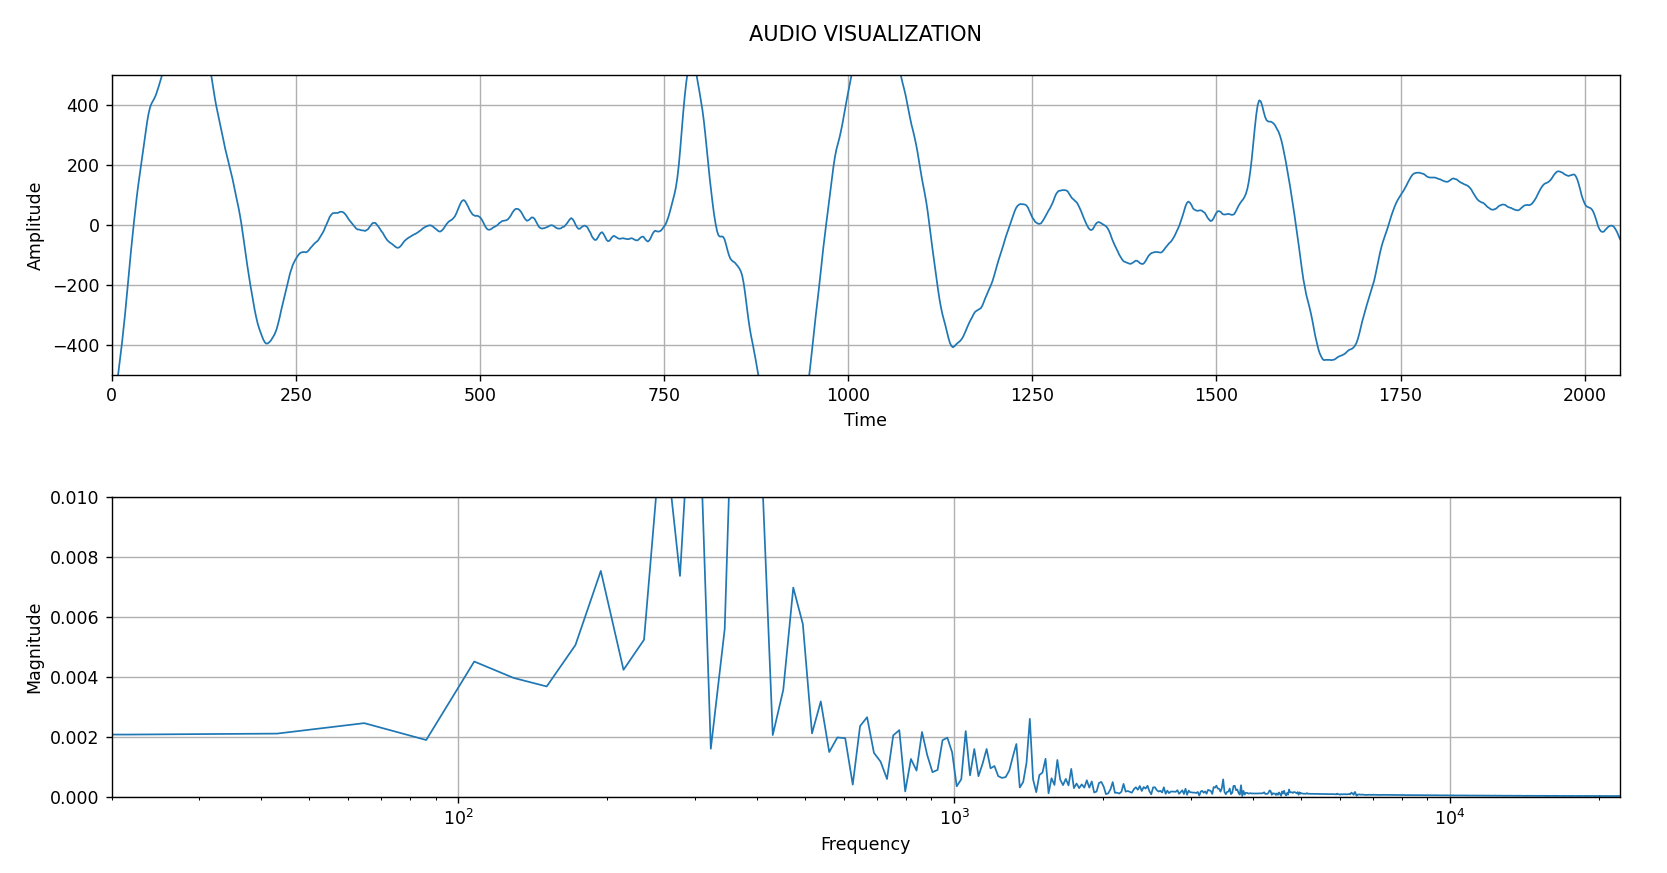

***Now, let us see the different waveform visualizations for different input waveforms


***




**Low amplitude low frequency audio input**

When a low amplitude low frequency audio signal is given as an input, the following waveform was visualized.

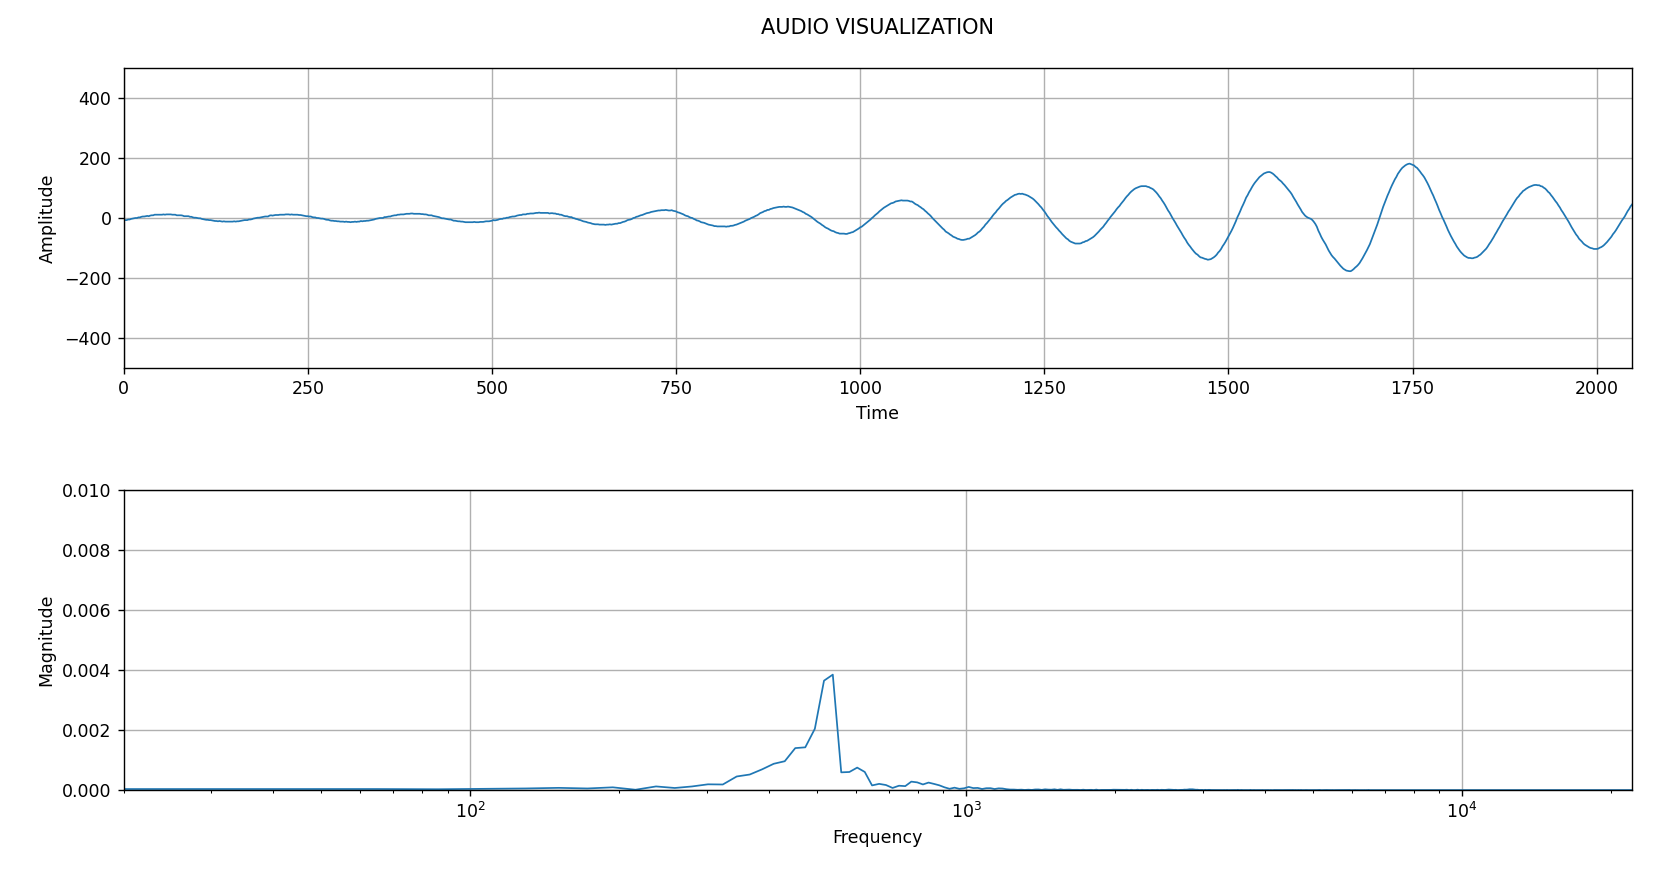

**Low amplitude high frequency audio input**

When a low amplitude high frequency audio signal is given as an input, the following waveform was visualized.

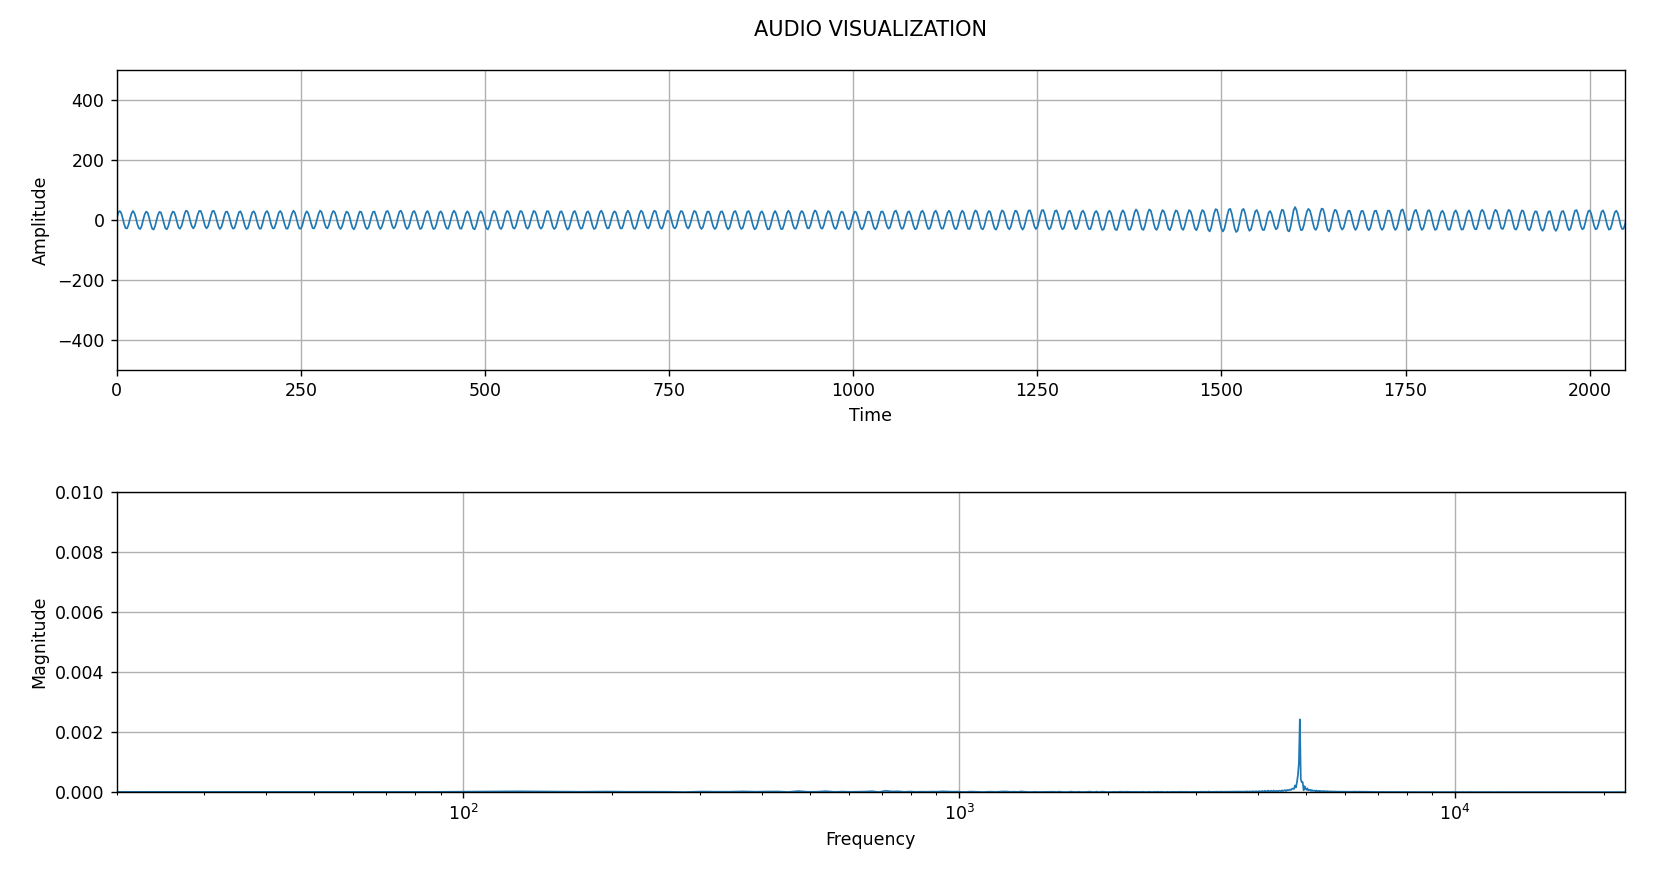

**high amplitude low frequency audio input**

When a low amplitude high frequency audio signal is given as an input, the following waveform was visualized.

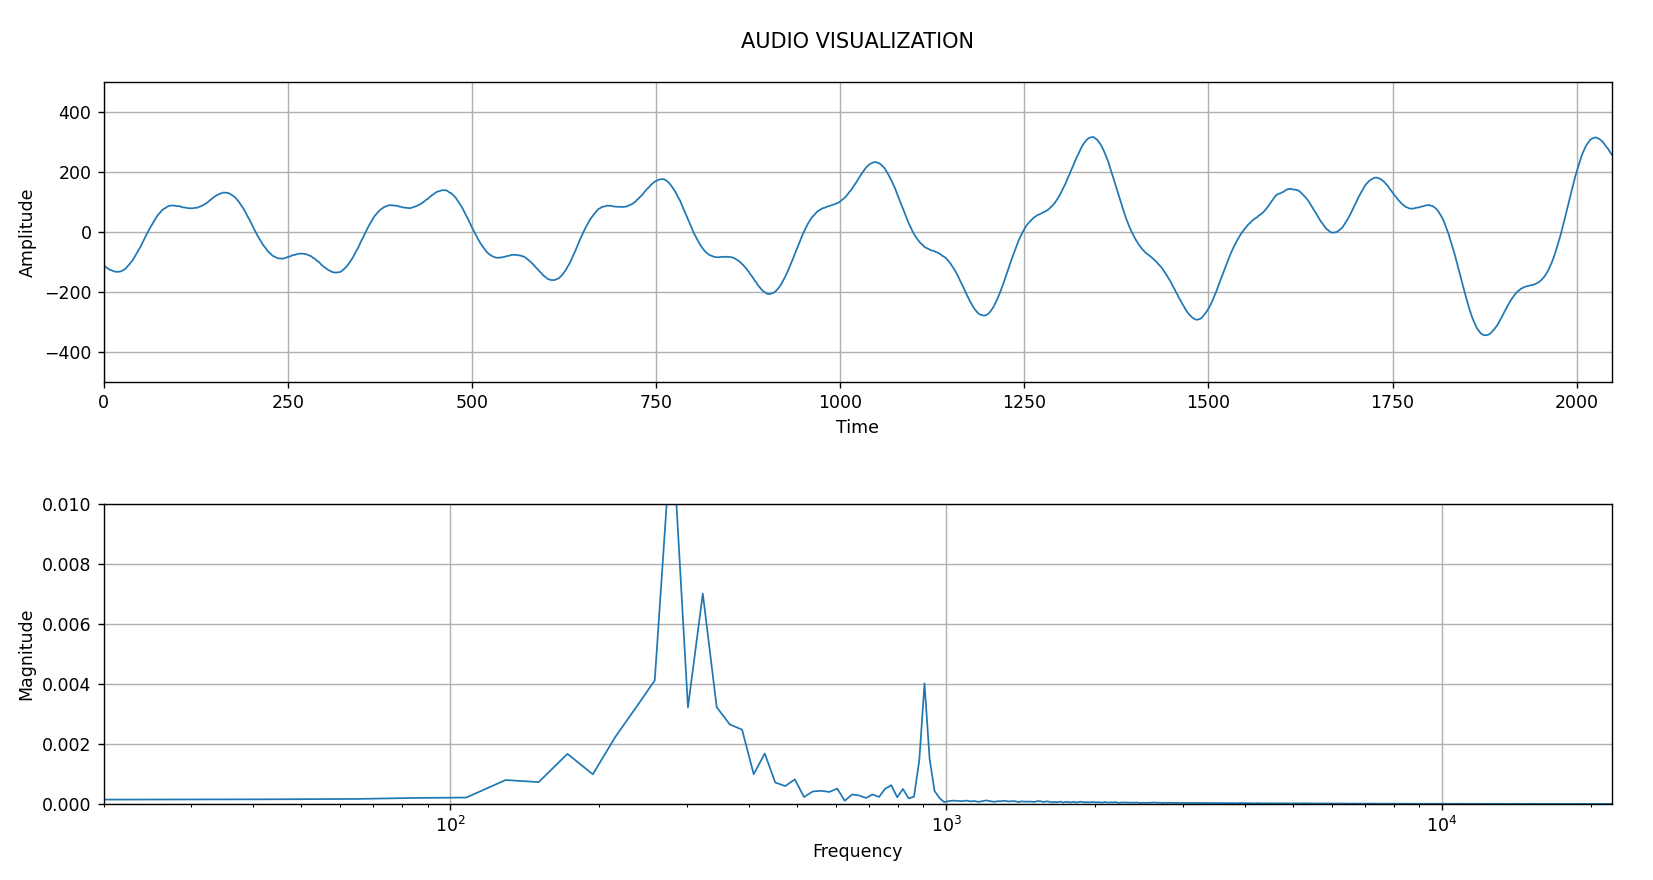

**high amplitude high frequency audio input**

When a low amplitude high frequency audio signal is given as an input, the following waveform was visualized.

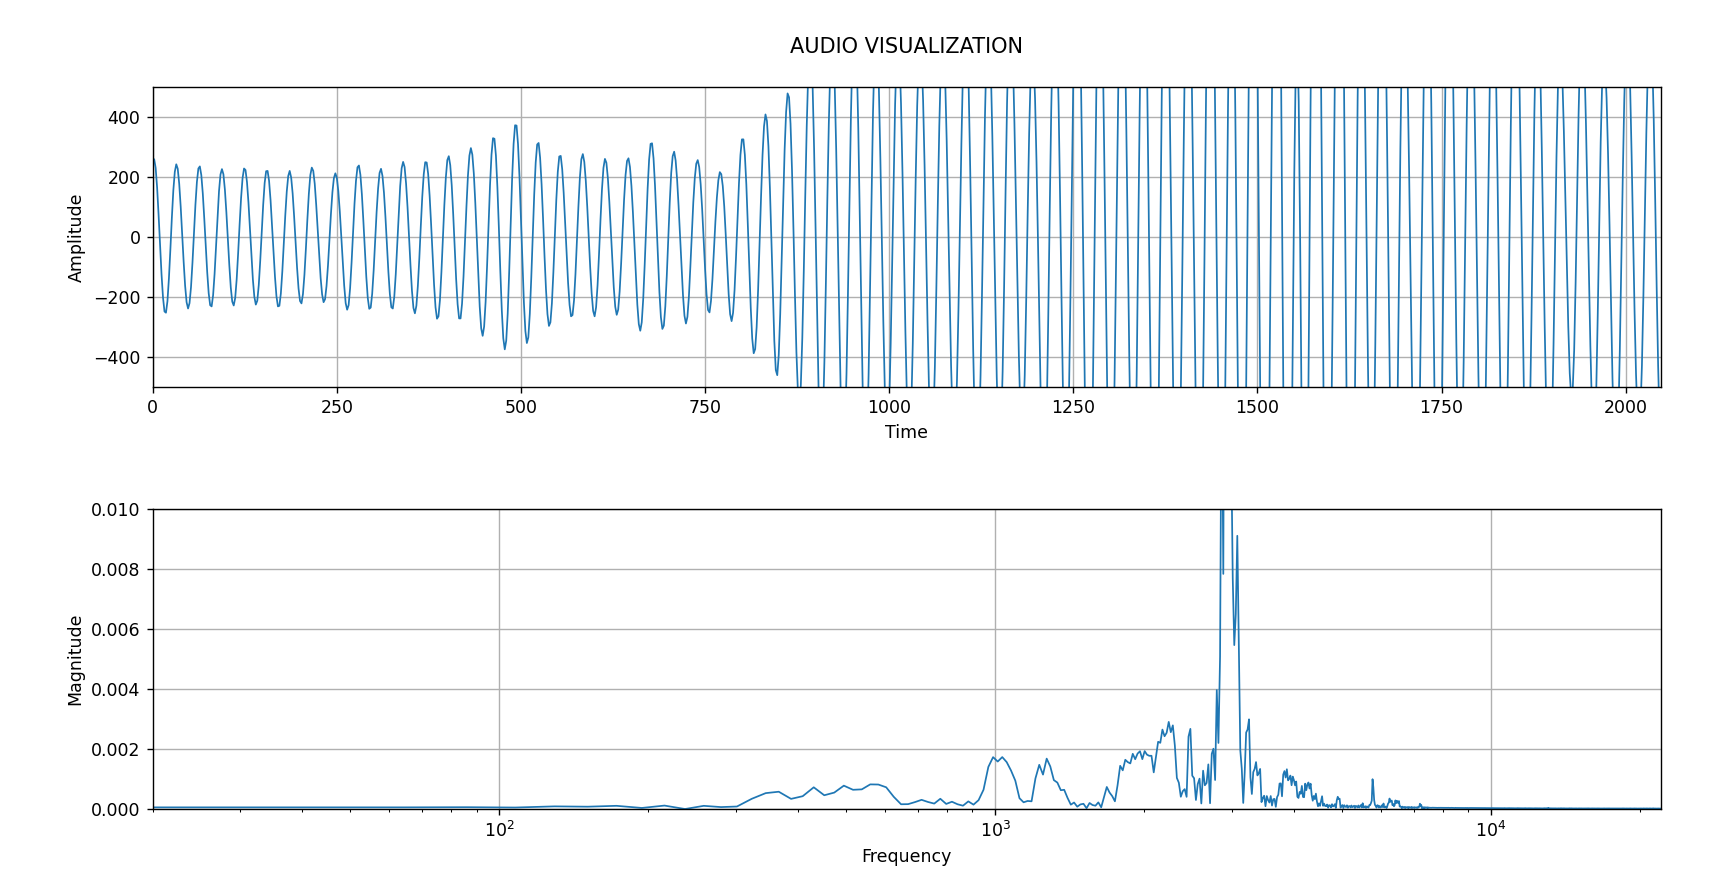